# Query environment

In [ ]:
#Be aware of your Jupyter environment stack:
display(Base.load_path())

# Setup environment

In [2]:
using RSDeltaSigmaPort
j=im
:READY

:READY

# 5th order, 2-level, baseband modulator

### NTF synthesis without zero-optimization

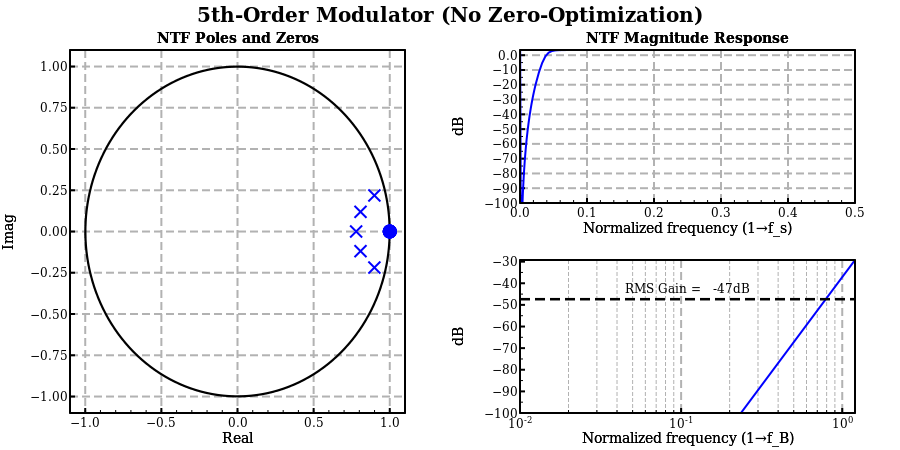

In [3]:
OSR = 32
NTF_noopt = synthesizeNTF(5, OSR, opt=0)
plot = plotNTF(NTF_noopt, OSR, color=:blue)
plot.title = "5th-Order Modulator (No Zero-Optimization)"
inlinedisp(plot, AR=2/1)

### NTF synthesis with optimized zeros

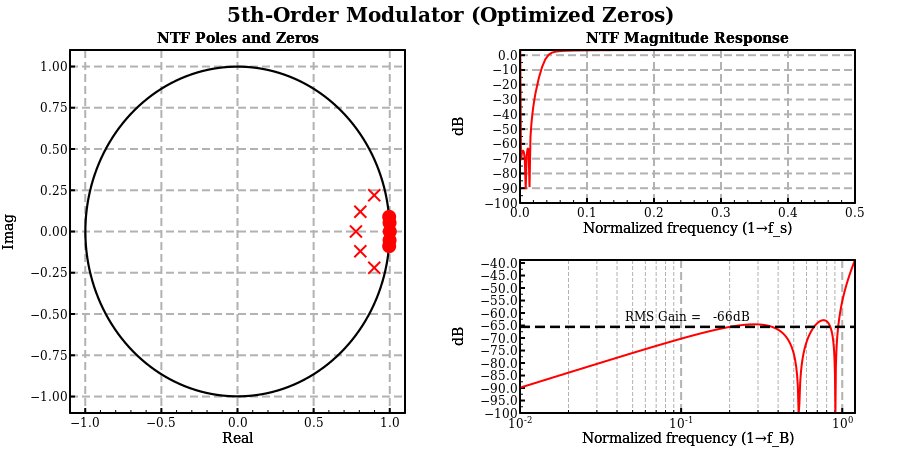

In [4]:
OSR = 32
NTF_opt = synthesizeNTF(5, OSR, opt=1)
plot = plotNTF(NTF_opt, OSR, color=:red)
plot.title = "5th-Order Modulator (Optimized Zeros)"
inlinedisp(plot, AR=2/1)

### NTF synthesis: comparison w.r.t. zero optimization (overlay results)

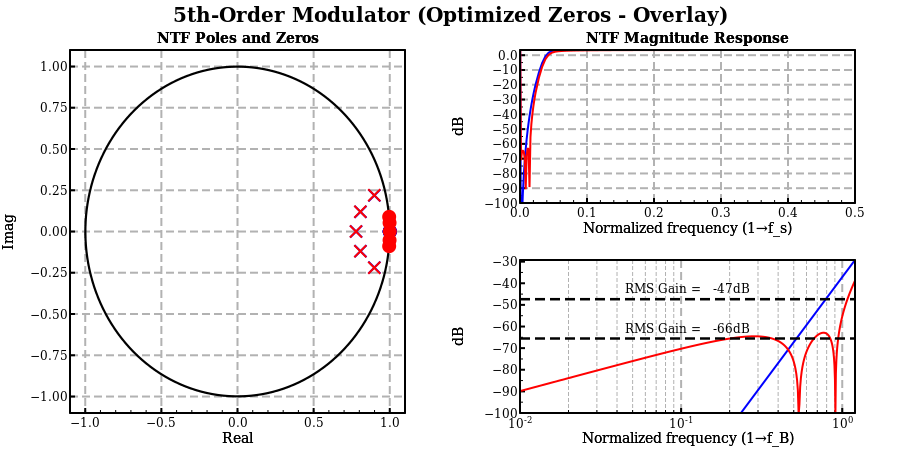

In [5]:
OSR = 32
plot = plotNTF(NTF_noopt, OSR, color=:blue)
plot = plotNTF!(plot, NTF_opt, OSR, color=:red)
plot.title = "5th-Order Modulator (Optimized Zeros - Overlay)"
inlinedisp(plot, AR=2/1)

# 8th order, 2-level, bandpass modulator
### NTF synthesis without zero-optimization

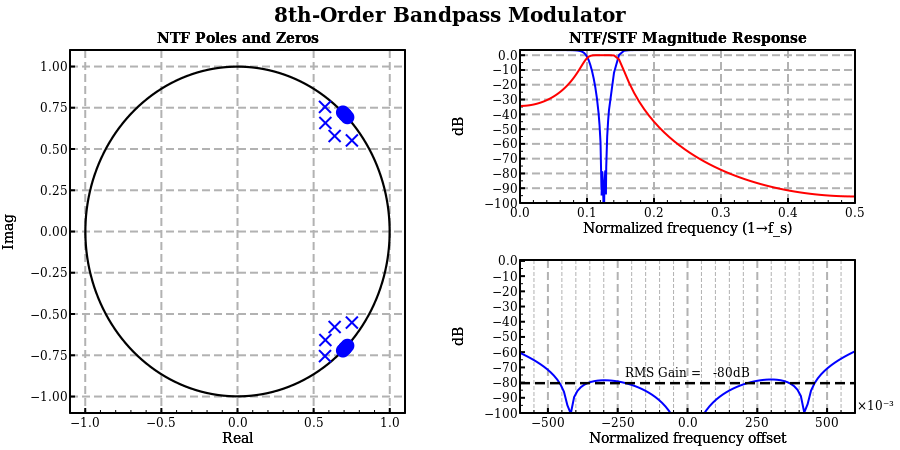

In [6]:
OSR = 64
order = 8
f0 = 0.125 #fs/8

function calcSTF(order, OSR, NTF, f0)
	G = _zpk(zeros(array_round(order/2)),NTF.p,1,1)
	G.k = 1/abs(evalTF(G,exp(2π*j*f0)))
	return G
end

NTF = synthesizeNTF(order, OSR, opt=2, f0=f0)
STF = calcSTF(order, OSR, NTF, f0)
plot = plotNTF(NTF, OSR, color=:blue, f0=f0, STF=STF)
plot.title = "8th-Order Bandpass Modulator"
inlinedisp(plot, AR=2/1)

# DONE